In [8]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import hist

In [12]:
with open("qjetmass_zjets_reco.pkl", "rb") as f:
    output = pickle.load( f )

In [13]:
h = output['ptfrac_z_jet_reco']
hlist = []
for i in range(h.axes[1].size-1):
    hlist.append(h[sum,i:i+1,:].values())





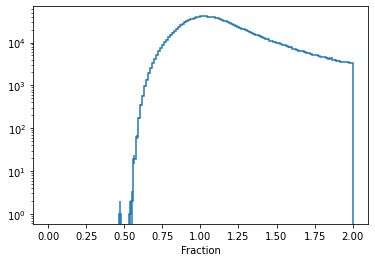

In [14]:
h.project('frac').plot()
plt.yscale('log')

In [15]:
frac_values = h.axes[2].centers
binlength = frac_values[2] - frac_values[0]


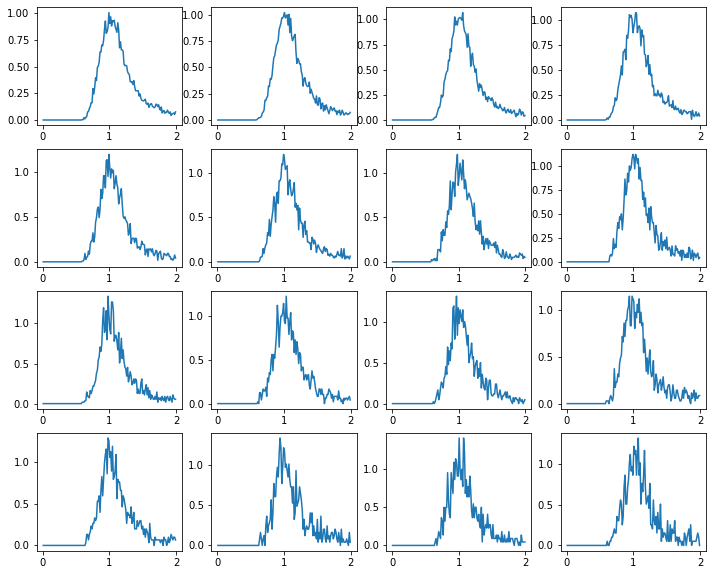

In [33]:
fig, ax = plt.subplots(nrows=4, ncols=4,figsize = (12,10))
hlist_plot = hlist[10:26]
for i,h in enumerate(hlist_plot):
        row = (i )//4 
        col = (i ) % 4

        h[0] = h[0]/(np.sum(h[0])*binlength)

        ax[row][col].plot(frac_values,h[0])




In [34]:
from scipy.optimize import curve_fit

# def gauss(x,  x0, sigma,a):
#     return (a*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x - x0) ** 2 / (2 * sigma ** 2)))

# def bw(x, x0, gamma,k):
#     """
#     Returns the relativistic Breit-Wigner distribution for mass m,
#     resonance mass m0 and width gamma.
#     """
#     #k = 2 * np.sqrt(2) * m0 * gamma * np.sqrt(m0**2 * (m0**2 + gamma**2))
#     return k / ((x**2 - x0**2)**2 + (x**2)*gamma**2)

# parameters, covariance = curve_fit(gauss, frac_values, hlist[1][0],bounds = ([0.5,0.05,-5],[2,0.3,5]))
# parameters1, covariance1 = curve_fit(bw, frac_values, hlist[1][0])

# mean = parameters[0]
# sigma = parameters[1]
# const = parameters[2]

# plt.figure(figsize = (16,5))
# print(const)

# plt.subplot(121)
# fit_dist2 = bw(frac_values,parameters1[0],parameters1[1],parameters1[2])
# plt.plot(frac_values,fit_dist2,'g--',label = 'bw fit')

# plt.plot(frac_values,hlist[1][0], 'r',label = 'data')
# plt.legend()


# plt.subplot(122)
# fit_dist = gauss(frac_values,mean,sigma,const)
# plt.plot(frac_values,fit_dist,'b--',label = 'gauss fit')

# plt.plot(frac_values,hlist[1][0], 'r',label = 'data')
# plt.legend()

In [35]:
from scipy.optimize import curve_fit
class Histfit:
    def __init__(self, histList):
        self.histList = histList
        self.N = len(histList)
        self.gaussMeanList = np.zeros(self.N)
        self.gaussWidthList = np.zeros(self.N)
        self.gaussConstList = np.zeros(self.N)
        self.bwMeanList = np.zeros(self.N)
        self.bwWidthList = np.zeros(self.N)
        self.bwConstList = np.zeros(self.N)
        self.meanList = np.zeros(self.N)
        self.stdList = np.zeros(self.N)
        for i in range(self.N): 
            self.meanList[i] = np.average(frac_values, weights=hlist[i][0])

    def estimate_std(self, hist, mean):
        # get midpoint of each bin
        midpoints = frac_values

        # get frequency of each bin
        weights = hist

        # estimate standard deviation
        std = np.sqrt(np.sum(weights * (midpoints - mean)**2) / (np.sum(weights) - 1)) 

        return std    
    
    def fill_std(self):
        for i in range(self.N):
            self.stdList[i] = self.estimate_std(self.histList[i][0], self.meanList[i])

    def gauss(self,x,  x0, sigma,a):
        return (a*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x - x0) ** 2 / (2 * sigma ** 2)))

    def bw(self,x, x0, gamma,k):
        """
        Returns the relativistic Breit-Wigner distribution for mass m,
        resonance mass m0 and width gamma.
        """
        #k = 2 * np.sqrt(2) * m0 * gamma * np.sqrt(m0**2 * (m0**2 + gamma**2))
        return k / ((x**2 - x0**2)**2 + (x**2)*gamma**2)

    
    def fitGauss(self,hist):
        parameters, covariance = curve_fit(self.gauss, frac_values, hist,bounds = ([0.5,0.05,-5],[1.5,0.3,5]))
        mean = parameters[0]
        sigma = parameters[1]
        const = parameters[2]
        return mean,sigma,const
    
    def fitbw(self,hist):
        parameters, covariance = curve_fit(self.bw, frac_values, hist,bounds = ([0.5,0.05,-5],[2,0.3,5]))
        mean = parameters[0]
        sigma = parameters[1]
        const = parameters[2]
        return mean,sigma,const
    
    def storeParameters(self):
        self.fill_std()
        for i in range(len(self.histList)):
            hist = self.histList[i][0]
            parameters = self.fitGauss(hist)
            self.gaussMeanList[i] = parameters[0]
            self.gaussWidthList[i] = parameters[1]
            self.gaussConstList[i] = parameters[2]
            parameters = self.fitbw(hist)
            self.bwMeanList[i] = parameters[0]
            self.bwWidthList[i] = parameters[1]
            self.bwConstList[i] = parameters[2]
            
    def plotGaussparameters(self):
        plt.figure(figsize = (16,5))
        plt.subplot(131)
        plt.plot(10*np.arange(self.N),self.gaussMeanList)
        plt.xlabel("pt,GeV")
        plt.ylabel("Mean")
        plt.subplot(132)
        plt.plot(10*np.arange(self.N),self.gaussWidthList)
        plt.xlabel("pt,GeV")
        plt.ylabel("Width")
        plt.subplot(133)
        plt.plot(10*np.arange(self.N),self.gaussConstList)
        plt.xlabel("pt,GeV")
        plt.ylabel("Const")
    def plotBWparameters(self):
        plt.figure(figsize = (16,5))
        plt.subplot(131)
        plt.plot(10*np.arange(self.N),self.bwMeanList)
        plt.xlabel("pt,GeV")
        plt.ylabel("Mean")
        plt.subplot(132)
        plt.plot(10*np.arange(self.N),self.bwWidthList)
        plt.xlabel("pt,GeV")
        plt.ylabel("Width")
        plt.subplot(133)
        plt.plot(10*np.arange(self.N),self.bwConstList)
        plt.xlabel("pt,GeV")
        plt.ylabel("Const")
    def showFit(self,n):
        self.fill_std()
        
        #parameters, covariance = curve_fit(self.gauss, frac_values, self.histList[n][0],bounds = ([0.5,0.05,-5],[2,0.3,5]))
        parameters1, covariance1 = curve_fit(self.bw, frac_values, self.histList[n][0])

        hnew = hlist[n][0][ (frac_values >= self.meanList[n] - self.stdList[n] ) & (frac_values <= self.meanList[n] + self.stdList[n]) ]

        frac_valuenew = frac_values[(frac_values >= self.meanList[n] - self.stdList[n] ) & (frac_values <= self.meanList[n] + self.stdList[n])]

        parameters, covariance = curve_fit(self.gauss, frac_valuenew, hnew,bounds = ([0.5,0.05,-5],[2,0.3,5]))

        mean = parameters[0]
        sigma = parameters[1]
        const = parameters[2]

        plt.figure(figsize = (16,5))
        plt.subplot(121)
        fit_dist2 = self.bw(frac_values,parameters1[0],parameters1[1],parameters1[2])
        plt.plot(frac_values,fit_dist2,'g--',label = 'bw fit')

        plt.plot(frac_values,self.histList[n][0], 'r',label = 'data')
        plt.legend()


        plt.subplot(122)
        #fit_dist = self.gauss(frac_values,mean,sigma,const)
        #plt.plot(frac_values,fit_dist,'b--',label = 'gauss fit')

        fit_dist = self.gauss(frac_valuenew,mean,sigma,const)
        plt.plot(frac_valuenew,fit_dist,'b--',label = 'gauss fit')

        plt.plot(frac_valuenew,hnew, 'r',label = 'data')
        plt.legend()
    

In [36]:
histfit = Histfit(hlist[:10])
histfit.fill_std()

In [37]:
histfit = Histfit(hlist[:10])
#histfit.storeParameters()


Gauss


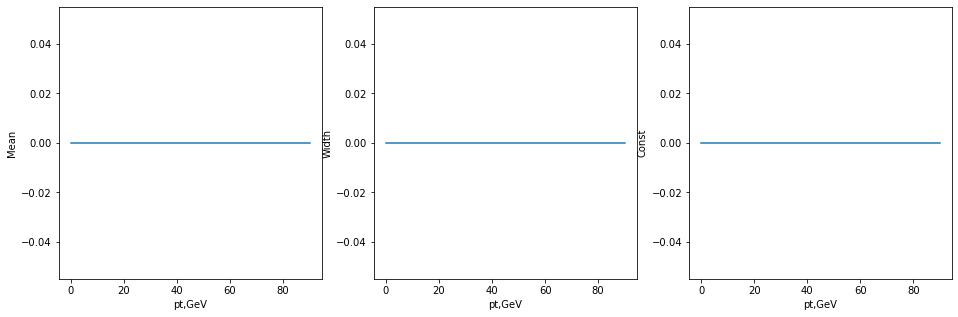

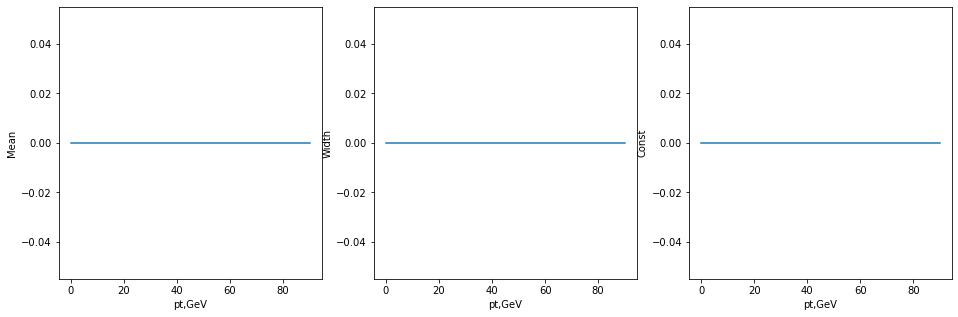

In [38]:
print('Gauss')
histfit.plotGaussparameters()
histfit.plotBWparameters()

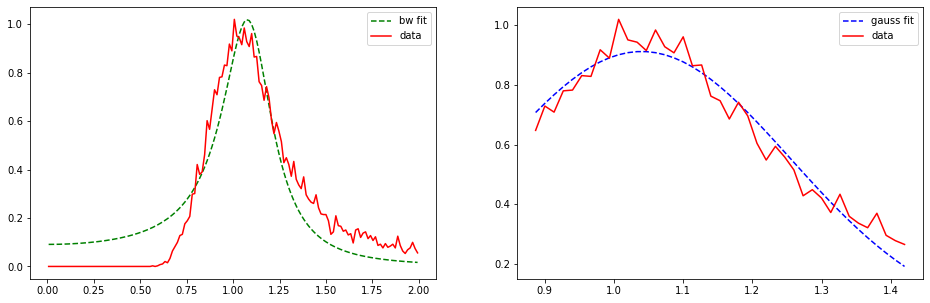

In [39]:
histfit.showFit(9)

In [19]:
meanlist = []
sigmalist = []
for h in hlist:
    frac_values = h.axes[2].centers
    count_values = h.project('frac').values()
    count_values = count_values/(np.sum(count_values)*frac_binwidth)
    parameters, covariance = curve_fit(gauss, frac_values, count_values,bounds = ([1,0.1],[1.5,0.4]))
    mean = parameters[0]
    sigma = parameters[1]
    meanlist.append(mean)
    sigmalist.append(sigma)

AttributeError: 'numpy.ndarray' object has no attribute 'axes'

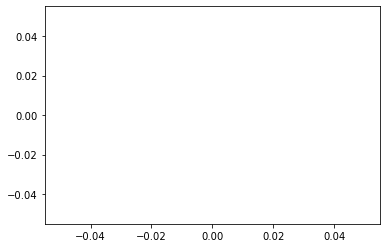

In [20]:
plt.scatter(np.arange(len(meanlist)),meanlist)

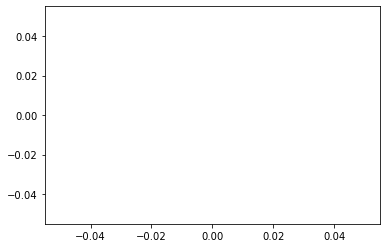

In [21]:
plt.scatter(np.arange(len(meanlist)),sigmalist)

In [23]:
h = output['ptfrac_z_jet_gen']

hnew = h[:,4:5,:]
hnew.sum()




WeightedSum(value=13098.4, variance=1356.28)

In [24]:
hnew.project('frac')

Hist(Regular(150, 0, 2, name='frac', label='Fraction'), storage=Weight()) # Sum: WeightedSum(value=212885, variance=20977.1) (WeightedSum(value=214420, variance=20983.1) with flow)

In [25]:
h = output['ptfrac_z_jet_gen']

hnew = h[sum,:,:]
hh = hnew[1:3,:]
hh2 = hnew[3:5,:]

0.0


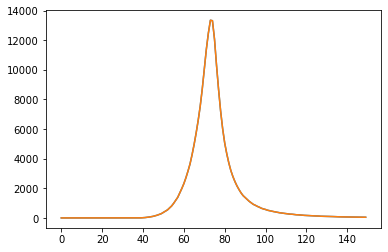

In [26]:
a = hh.project('frac').values()
b = hh2.project('frac').values()
plt.plot(a)
plt.plot(b)
print(np.sum(a)-np.sum(b))


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f0ccee92670>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

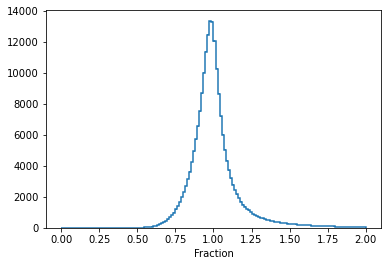

In [27]:
h.project('frac').plot()

In [28]:
hnew = h[sum,:,:]
hh = hnew[2:3,:]
array2 = hh.values()

In [29]:
array2.shape

(1, 150)

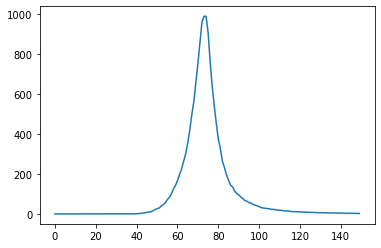

In [30]:
plt.plot(array2[0])

In [32]:
len(hlist)dd

59

In [33]:
plt.plot(frhlist[0][0])

plt.ylim(500,10000)
plt.yscale('log')

NameError: name 'frhlist' is not defined

In [34]:
np.mean(hlist[0][0])

463.21375502796184

In [19]:
hlist[0][0] = hlist[0][0]/(np.sum(hlist[0][0])*binlength)

mean = np.average(frac_values, weights=hlist[0][0])
stdarray = (binlength*hlist[0][0])
std = np.std(stdarray)

print(mean)


1.0041847970200057


In [20]:
import scipy
scipy.stats.binned_statistic(frac_values,hlist[0][0])

BinnedStatisticResult(statistic=array([0.        , 0.        , 0.00250086, 0.12771071, 1.30206963,
       0.86024926, 0.13306801, 0.04505184, 0.01979845, 0.00955125]), bin_edges=array([0.00666667, 0.20533333, 0.404     , 0.60266667, 0.80133333,
       1.        , 1.19866667, 1.39733333, 1.596     , 1.79466667,
       1.99333333]), binnumber=array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10

In [35]:
def estimate_std(hist):
    # get midpoint of each bin
    midpoints = frac_values

    # get frequency of each bin
    weights = hist

    # estimate standard deviation
    std = np.sqrt(np.sum(weights * (midpoints - mean)**2) / (np.sum(weights) - 1))

    return std

std = estimate_std(hlist[0][0])

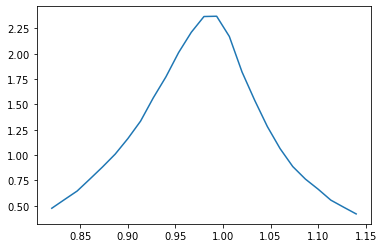

In [37]:
hnew = hlist[0][0][ (frac_values >= mean-std) & (frac_values <= mean+std) ]
frac_valuenew = frac_values[(frac_values >= mean-std) & (frac_values<= mean+std)]

#plt.plot(frac_values,hlist[0][0])
plt.plot(frac_valuenew,hnew)


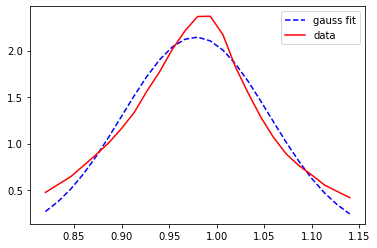

In [38]:
def gauss(x,  x0, sigma,a):
    return (a*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x - x0) ** 2 / (2 * sigma ** 2)))
parameters, covariance = curve_fit(gauss, frac_valuenew, hnew,bounds = ([0.5,0.05,-5],[2,0.3,5]))
mean = parameters[0]
sigma = parameters[1]
const = parameters[2]

fit_dist = gauss(frac_valuenew,mean,sigma,const)
plt.plot(frac_valuenew,fit_dist,'b--',label = 'gauss fit')

plt.plot(frac_valuenew,hnew, 'r',label = 'data')
plt.legend()